Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load         

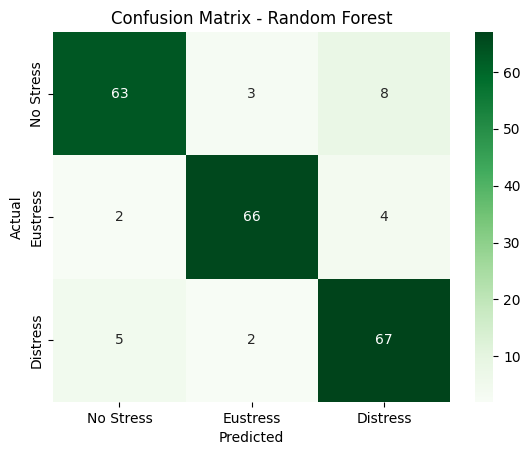

Train accuracy :  1.0
Test accuracy :  0.8909090909090909
Precision: 0.8922
Recall:    0.8909
F1 Score:  0.8910
Accuracy:  0.8909

Top 10 Features by Importance:
                         Feature  Importance
5                 blood_pressure    0.169217
6                  sleep_quality    0.080336
12          academic_performance    0.071338
14  teacher_student_relationship    0.066827
3                     depression    0.064771
16                social_support    0.062713
0                  anxiety_level    0.057120
11                   basic_needs    0.054916
1                    self_esteem    0.049195
19                      bullying    0.047424


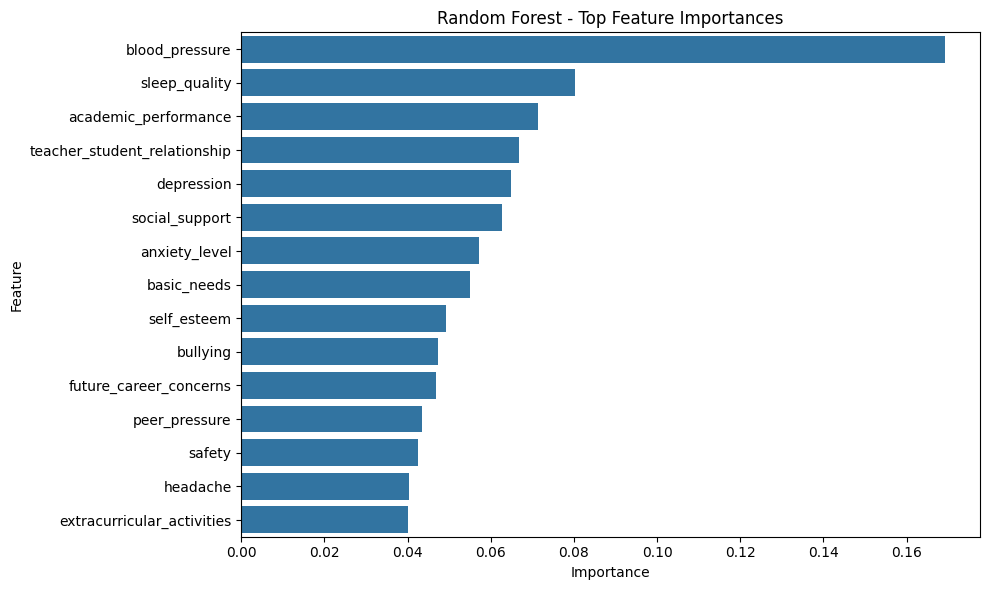

In [1]:
# ===============================
# Random Forest Classifier for Student Stress Prediction
# ===============================

# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.ensemble import RandomForestClassifier  # Random Forest algorithm
from sklearn.metrics import (classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score, accuracy_score)  # Evaluation metrics
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For plotting

# ===============================
# Load the Dataset
# ===============================
# Dataset Source: Kaggle (https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets)

file_path = "./StressLevelDataset.csv"  # Update the path if necessary
df = pd.read_csv(file_path)

# Inspect dataset
print("Dataset Info:")
print(df.info())  # Information about dataset
print("\nFirst 5 rows:")
print(df.head())  # Print sample records

# ===============================
# Target Variable
# ===============================
target_column = 'stress_level'
print("\nClass Distribution:\n", df[target_column].value_counts())

# ===============================
# Data Preprocessing
# ===============================
# Fill missing values with median (if any)
if df.isnull().sum().sum() > 0:
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    print("\nMissing values were imputed with median.")
else:
    print("\nNo missing values found.")

# Define features (X) and target (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain samples: {X_train.shape[0]} (Class distribution: {np.bincount(y_train)})")
print(f"Test samples: {X_test.shape[0]} (Class distribution: {np.bincount(y_test)})")

# ===============================
# Random Forest Classifier
# ===============================
clf = RandomForestClassifier(
    n_estimators=200,        # Number of trees
    max_depth=12,            # Limit depth to prevent overfitting
    min_samples_split=5,     # Minimum samples to split a node
    min_samples_leaf=2,      # Minimum samples at a leaf node
    class_weight="balanced", # Handle any imbalance
    random_state=42
)

clf.fit(X_train, y_train)  # Train the model

# ===============================
# Predictions and Evaluation
# ===============================
y_pred = clf.predict(X_test)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Stress', 'Eustress', 'Distress'],
            yticklabels=['No Stress', 'Eustress', 'Distress'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Performance Metrics
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
accuracy = accuracy_score(y_test, y_pred)

# Accuracy for  Test and Train 
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
print("Train accuracy : ",train_accuracy)
test_accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Test accuracy : ",test_accuracy)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Accuracy:  {accuracy:.4f}")

# ===============================
# Feature Importance
# ===============================
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Features by Importance:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(15))
plt.title("Random Forest - Top Feature Importances")
plt.tight_layout()
plt.show()
